In [10]:
"""
For section 1: You need to write your code in order to regenerate the exact result as shown under each question
For section 2: You need to generate the answers based on the questions without having the sample results.

"""

print(__doc__)


For section 1: You need to write your code in order to regenerate the exact result as shown under each question
For section 2: You need to generate the answers based on the questions without having the sample results.




# Section 1

### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import pandas as pd
import numpy as np

# File to Load (Remember to Change These)
file_to_load = "purchase_data.csv"

# Read Purchasing File and store into Pandas data frame
purchase_data = pd.read_csv('/Users/ashok/Downloads/purchase_data.csv')

purchase_data.head()

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44


### Q1 - check for missing data

In [15]:
purchase_data.isna().sum()

Purchase ID    0
SN             0
Age            0
Gender         0
Item ID        0
Item Name      0
Price          0
dtype: int64

## Player Count

### Q2 - Display the total number of players


In [61]:
purchase_data_tot_players = purchase_data.agg({"SN": "nunique"})
purchase_data_tot_players

SN    576
dtype: int64

### Q3- Purchasing Analysis (Total)

* Obtain number of unique items, average price, etc.


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame


In [64]:
summary_df = pd.DataFrame()
item_count = purchase_data.agg({"Item ID": "nunique"})
average_price = purchase_data.agg({"Price": "mean"})
average_age=purchase_data.agg({'Age':"mean"})
total_purchases = purchase_data.agg({"Purchase ID": "nunique"})
total_revenue = purchase_data.agg({"Price" : "sum"})

type(item_count)
summary_df = pd.concat([item_count,average_price,average_age,total_purchases,total_revenue])


summary_df = pd.DataFrame(summary_df)

summary_df 

,0
Item ID,183.000000
Price,3.050987
Age,22.714103
Purchase ID,780.000000
Price,2379.770000


In [65]:
clean_summary_df = summary_df.rename(index={'Item ID': 'Unique items', 
                                     'Price':'Average Price',
                                     'Age':'Average Age',
                                     'Purchase ID': 'Total Purchases',
                                     'Price': 'Total Revenue'})
clean_summary_df

,0
Unique items,183.000000
Total Revenue,3.050987
Average Age,22.714103
Total Purchases,780.000000
Total Revenue,2379.770000


### Q4- Gender Demographics

* Percentage and Count of Male Players


* Percentage and Count of Female Players


* Percentage and Count of Other / Non-Disclosed




In [82]:
from pandas.core.reshape.concat import concat
gender=purchase_data['Gender'].value_counts()
total=len(purchase_data)
gender_demo=pd.DataFrame()
gender_demo['Gender Count']=gender
gender_demo['Gender Percentage']=(gender/total)*100
gender_demo

,Gender Count,Gender Percentage
Male,652,83.589744
Female,113,14.487179
Other / Non-Disclosed,15,1.923077



### Q5-Purchasing Analysis (Gender)

* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. by gender




* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting




In [83]:
gen_purchase = purchase_data.groupby(['Gender']).agg({'Purchase ID': 'nunique','Price': 'sum'})
gen_purchase.rename(columns = {'Purchase ID':'Count','Price': 'Average Price'}, inplace = True)
gen_purchase['Average total per person'] = gen_purchase['Average Price']/gen_purchase['Count']
gen_purchase

,Count,Average Price,Average total per person
Gender,,,
Female,113,361.94,3.203009
Male,652,1967.64,3.017853
Other / Non-Disclosed,15,50.19,3.346000


#### Q6-Display the summary data frame

In [78]:
gender['Gender']=purchase_data['Gender'].value_counts()
total=len(purchase_data)
Summary=pd.DataFrame()
Summary['Gender Percentage']=(gender/total)*100
Summary=purchase_data.groupby(['Gender']).agg({'Purchase ID':'nunique'})
Summary['Price Average']=purchase_data.groupby('Gender')['Price'].mean()
Summary['Total Purchase']=purchase_data.groupby('Gender')['Price'].sum()
Summary['No of players']=purchase_data.groupby(['Gender']).agg({'SN':'nunique'})
Summary

,Purchase ID,Price Average,Total Purchase,No of players
Gender,,,,
Female,113,3.203009,361.94,81
Male,652,3.017853,1967.64,484
Other / Non-Disclosed,15,3.346000,50.19,11


### Q7- Age Demographics

* Establish bins for ages


* Categorize the existing players using the age bins. Hint: use pd.cut()


* Calculate the numbers and percentages by age group


* Create a summary data frame to hold the results


* Optional: round the percentage column to two decimal points


* Display Age Demographics Table


In [79]:
age_grp = [ purchase_data['Age'] < 10 , 
             ((purchase_data['Age'] >= 10) & (purchase_data['Age'] <= 14)),
            ((purchase_data['Age'] >= 15) & (purchase_data['Age'] <= 19 )),
            ((purchase_data['Age'] >= 20) & (purchase_data['Age'] <=24)),
            ((purchase_data['Age'] >= 25) & (purchase_data['Age'] <=29)),
             ((purchase_data['Age'] >= 30) & (purchase_data['Age'] <=34)),
             ((purchase_data['Age'] >= 35) & (purchase_data['Age'] <=39)),
             ((purchase_data['Age'] >= 40))]
              
age_catg = ['<10','10-14','15-19','20-24','25-29','30-34','35-39','40+']
              
purchase_data['age_group'] = np.select(age_grp, age_catg)

age_summary = purchase_data.groupby(['age_group']).agg(Total_Count=('SN','nunique'))
age_summary['Percentage of Players']= (age_summary['Total_Count']/sum(age_summary['Total_Count'])*100).round(2)
age_summary

,Total_Count,Percentage of Players
age_group,,
10-14,22,3.82
15-19,107,18.58
20-24,258,44.79
25-29,77,13.37
30-34,52,9.03
35-39,31,5.38
40+,12,2.08
<10,17,2.95


### Q8- Purchasing Analysis (Age)

* Bin the purchase_data data frame by age


* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. in the table below


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [80]:
age_purchase = purchase_data.groupby(['age_group']).agg(Purchase_Count=('Purchase ID','count'), 
                                                       Average_Purchase_Price = ('Price','mean'),
                                                       Total_Purchase_Value = ('Price','sum'))

age_purchase['Average_Purchase_Price'] = '$' + age_purchase['Average_Purchase_Price'].round(2).astype(str)
age_purchase['Total_Purchase_Value'] = '$' + age_purchase['Total_Purchase_Value'].round(2).astype(str)

age_purchase

,Purchase_Count,Average_Purchase_Price,Total_Purchase_Value
age_group,,,
10-14,28,$2.96,$82.78
15-19,136,$3.04,$412.89
20-24,365,$3.05,$1114.06
25-29,101,$2.9,$293.0
30-34,73,$2.93,$214.0
35-39,41,$3.6,$147.67
40+,13,$2.94,$38.24
<10,23,$3.35,$77.13


### Q9-Top Spenders

* Run basic calculations to obtain the results in the table below


* Create a summary data frame to hold the results


* Sort the total purchase value column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [81]:
top_spenders = purchase_data.groupby(['SN']).agg(Purchase_Count=('Purchase ID','count'), 
                                                       Average_Purchase_Price = ('Price','mean'),
                                                       Total_Purchase_Value = ('Price','sum'))
top_five = top_spenders.sort_values(by=['Total_Purchase_Value'], ascending=False).head(5)
top_five['Average_Purchase_Price'] = '$' + top_five['Average_Purchase_Price'].round(2).astype(str)
top_five['Total_Purchase_Value'] = '$' + top_five['Total_Purchase_Value'].round(2).astype(str)
top_five

,Purchase_Count,Average_Purchase_Price,Total_Purchase_Value
SN,,,
Lisosia93,5,$3.79,$18.96
Idastidru52,4,$3.86,$15.45
Chamjask73,3,$4.61,$13.83
Iral74,4,$3.4,$13.62
Iskadarya95,3,$4.37,$13.1


### Q10-Most Popular Items

* Retrieve the Item ID, Item Name, and Item Price columns


* Group by Item ID and Item Name. Perform calculations to obtain purchase count, item price, and total purchase value


* Create a summary data frame to hold the results


* Sort the purchase count column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [66]:
Most_Polular_Items = purchase_data.groupby(['Item ID','Item Name']).agg(Count=('Purchase ID','count'), Average_Purchase= ('Price','mean'), Total_Purchase = ('Price','sum'))
Most_Polular_Items = Most_Polular_Items.sort_values(by=['Count'], ascending=False)
Most_Polular_Items.head(5)

,,Count,Average_Purchase,Total_Purchase
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,4.23,50.76
145,Fiery Glass Crusader,9,4.58,41.22
108,"Extraction, Quickblade Of Trembling Hands",9,3.53,31.77
82,Nirvana,9,4.90,44.10
19,"Pursuit, Cudgel of Necromancy",8,1.02,8.16


### Q11-Most Profitable Items

* Sort the above table by total purchase value in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the data frame



In [138]:
most_popular_items = most_popular_items.sort_values(by=['Total_Purchase_Value'], ascending=False)
most_popular_items.head(5)

,,Purchase_Count,Average_Purchase_Price,Total_Purchase_Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,4.23,50.76
82,Nirvana,9,4.90,44.10
145,Fiery Glass Crusader,9,4.58,41.22
92,Final Critic,8,4.88,39.04
103,Singed Scalpel,8,4.35,34.80


# Section 2

#### Q12: Import the covid-19 dataset provided and set the state as the index of the dataframe.

In [139]:
covid_data = pd.read_csv('/Users/ashok/Downloads/us_states_covid19_daily.csv'
                        , index_col = 'state')
covid_data.head(5)

,death,hospitalized,negative,pending,positive,recovered,total
state,,,,,,,
WY,50,272.0,95212,NaN,5948,4791.0,101160
NE,478,2315.0,410594,NaN,45044,33198.0,455638
ND,191,859.0,219646,NaN,21846,17938.0,241492
NC,3532,NaN,2824239,NaN,210632,184422.0,3034871
MT,180,717.0,330087,NaN,13071,9256.0,343158


#### Q13: Replace all the NaN values in 'pending' column with the string 'None'.

In [140]:
covid_data['pending'] = covid_data['pending'].fillna('None')
covid_data.head(5)

,death,hospitalized,negative,pending,positive,recovered,total
state,,,,,,,
WY,50,272.0,95212,None,5948,4791.0,101160
NE,478,2315.0,410594,None,45044,33198.0,455638
ND,191,859.0,219646,None,21846,17938.0,241492
NC,3532,NaN,2824239,None,210632,184422.0,3034871
MT,180,717.0,330087,None,13071,9256.0,343158


#### Q14: Replace the NaN values in the 'hospitalized' columns with the mean value of the column.

In [141]:
covid_data['hospitalized'] = pd.to_numeric(covid_data['hospitalized'], errors='coerce')
covid_data.describe()
covid_data['hospitalized'] = covid_data['hospitalized'].fillna((covid_data['hospitalized'].mean()))
covid_data.head(5)

,death,hospitalized,negative,pending,positive,recovered,total
state,,,,,,,
WY,50,272.000000,95212,None,5948,4791.0,101160
NE,478,2315.000000,410594,None,45044,33198.0,455638
ND,191,859.000000,219646,None,21846,17938.0,241492
NC,3532,11044.567568,2824239,None,210632,184422.0,3034871
MT,180,717.000000,330087,None,13071,9256.0,343158


#### Q15: Find the death percentage (round to 2 decimal points) of covid positive patients for each state and add it as a column in the dataset. (death% = death/positive)

In [52]:
covid_data['death_rate']= (covid_data['death']/covid_data['positive']*100).round(2)
covid_data.head(5)

,death,hospitalized,negative,pending,positive,recovered,total,death_rate
state,,,,,,,,
WY,50,272.000000,95212,None,5948,4791.0,101160,0.84
NE,478,2315.000000,410594,None,45044,33198.0,455638,1.06
ND,191,859.000000,219646,None,21846,17938.0,241492,0.87
NC,3532,11044.567568,2824239,None,210632,184422.0,3034871,1.68
MT,180,717.000000,330087,None,13071,9256.0,343158,1.38


#### Q16: Print the total number of negative, positive, and recovered cases in the US.

In [54]:
covid_data['recovered'] = pd.to_numeric(covid_data['recovered'], errors='coerce')
covid_data['recovered'] = covid_data['recovered'].fillna(0)
print('No of negative cases:', sum(covid_data['negative']))
print('No of positive cases:', sum(covid_data['positive']))
print('No of recovered cases:', sum(covid_data['recovered']))

No of negative cases: 92955835
No of positive cases: 7198622
No of recovered cases: 2840747.0


#### Q17: What percent of the covid positive patients from the state of NY were hospitalized (round the value to 2 decimal places)?

In [55]:
NY = covid_data.loc[['NY']]
(NY['hospitalized']/NY['positive']*100).round(2)

state
NY    19.62
dtype: float64

#### Q18: Return the state name with the maximum number of covid positive cases

In [57]:
covid_data.sort_values(by=['positive'], ascending=False).head(1)

,death,hospitalized,negative,pending,positive,recovered,total,death_rate
state,,,,,,,,
CA,15792,11044.567568,13894577,None,810625,0.0,14705202,1.95


#### Q19: Return the number of states with more than the mean value of positive cases

In [142]:
sum(covid_data['positive']>covid_data['positive'].mean())

19

#### Q20: Print the data of those states whose no of negative cases is greater than the number of negative cases for MT. Then sort the dataframe wrt the total column values in descending order.

In [143]:
MT= covid_data.loc[['MT']]
MT

idx = np.where(covid_data['negative']> sum(MT['negative']))
type(idx)

idx



(array([ 1,  3,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
        22, 23, 24, 25, 28, 31, 34, 35, 36, 37, 39, 40, 41, 42, 44, 46, 47,
        48, 49, 51, 52, 53, 54, 55], dtype=int64),)

In [144]:
covid_data['greater_than_MT'] = covid_data['negative'].apply(lambda x: 'True' if x > sum(MT['negative']) else 'False')
covid_MT = covid_data.loc[covid_data['greater_than_MT'] == 'True']
covid_MT = covid_MT.sort_values(by=['negative'], ascending=False)
covid_MT.head(5)

,death,hospitalized,negative,pending,positive,recovered,total,greater_than_MT
state,,,,,,,,
CA,15792,11044.567568,13894577,None,810625,NaN,14705202,True
NY,25479,89995.000000,10288664,None,458649,76754.0,10747313,True
TX,15711,11044.567568,5488190,None,748967,664883.0,6237157,True
IL,8916,11044.567568,5331548,None,295763,NaN,5627311,True
FL,14488,44608.000000,4594668,3980.0,706516,NaN,5301184,True


#### Q21: Create a new column called recovery_rate which classifies a state as- 
    a) 'High Recovery' when recovered% > 50
    b) 'Modearate Recovery' when recovered% is between 25 and 50 
    c) 'Low Recovery' when recovered% is less than 25
#### where recovered% = recovered / positive for each state

In [146]:
covid_data['recovery_rate']= covid_data['recovered']/covid_data['positive']*100


recovery_groups = [ covid_data['recovery_rate'] < 25 , 
             ((covid_data['recovery_rate'] >= 25) & (covid_data['recovery_rate'] <= 50)),
            ((covid_data['recovery_rate'] >= 50))]
              
categories = ['Low Recovery','Moderate Recovery','High Recovery']

covid_data['recovery_group'] = np.select(recovery_groups, categories)
covid_data.head()

,death,hospitalized,negative,pending,positive,recovered,total,greater_than_MT,recovery_rate,recovery_group
state,,,,,,,,,,
WY,50,272.000000,95212,None,5948,4791.0,101160,False,80.548083,High Recovery
NE,478,2315.000000,410594,None,45044,33198.0,455638,True,73.701270,High Recovery
ND,191,859.000000,219646,None,21846,17938.0,241492,False,82.111142,High Recovery
NC,3532,11044.567568,2824239,None,210632,184422.0,3034871,True,87.556497,High Recovery
MT,180,717.000000,330087,None,13071,9256.0,343158,False,70.813251,High Recovery


# Plotting pandas using IRIS dataset

#### Note: This problem makes use of the iris data set and depends upon your having completed the previous problem, so please do that first.


In [52]:
iris = pd.read_csv('/Users/ashok/Downloads/iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Q22: Use the built-in pandas plotting tools to make a box-and-whisker plot showing the distribution of petal ratio and sepal ratio for each of the three species. Your plot should have two subplots, one for petal ratio and one for sepal ratio. You may choose the details of your plots (i.e., how to handle outliers, displaying mean vs median, etc) however you think is best. Please include labels on your x- and y-axes and give an appropriate title to your plot.

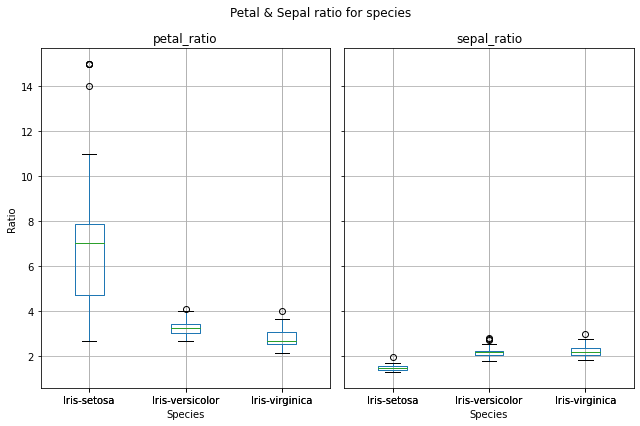

In [149]:
import matplotlib.pyplot as plt
iris['petal_ratio'] = iris['PetalLength']/ iris['PetalWidth']
iris['sepal_ratio'] = iris['SepalLength']/ iris['SepalWidth']
iris.head(5)



box = iris.boxplot(by='Name',column=['petal_ratio', 'sepal_ratio'], figsize=(9,6))
[ax_tmp.set_xlabel('Species') for ax_tmp in np.asarray(box).reshape(-1)]
[ax_tmp.set_ylabel('Ratio') for ax_tmp in np.asarray(box).reshape(-1)]
figure = np.asarray(box).reshape(-1)[0].get_figure()
figure.suptitle('Petal & Sepal ratio for species')
plt.show()

#### Q23: Use the built-in pandas plotting tools to make a scatter matrix plot for the four original features (petal width, petal length, sepal width and sepal length). Each point in the scatter plot should be colored according to its species. Hint: see the documentation at https://pandas.pydata.org/pandas-docs/stable/visualization.html# scatter-matrix-plot to get started.

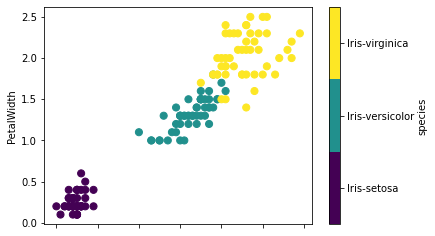

In [55]:
iris["species"] = pd.Categorical(iris['Name'])

iris.plot.scatter(x="PetalLength", y="PetalWidth", c="species", cmap="viridis", s=50);

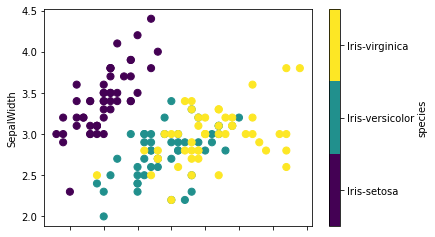

In [57]:
iris["species"] = pd.Categorical(iris['Name'])

iris.plot.scatter(x="SepalLength", y="SepalWidth", c="species", cmap="viridis", s=50);

## Load the stockprice dataset

In [5]:
stock = pd.read_csv('/Users/ashok/Downloads/timeseries_stockprice.csv', header=0)
stock.head()

,Date,Amazon,Google,Facebook
0,5/1/18,927.800,901.94,151.74
1,5/2/18,946.645,909.62,153.34
2,5/3/18,946.000,914.86,153.60
3,5/4/18,944.750,926.07,150.17
4,5/7/18,940.520,933.54,151.45


#### Q24-Plotting a single series

To plot a single series, such as the closing stock price for Amazon for each date, you can simple designate the x-axis values as Date and the y-axis values as Amazon and set the kind parameter to line.

Text(0, 0.5, 'Stock price')

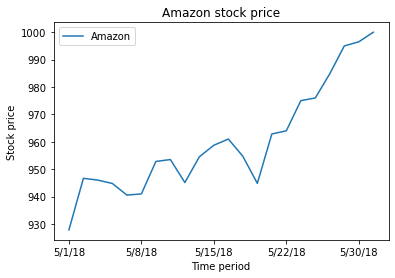

In [29]:
import matplotlib.pyplot as plt


stock.plot(x = "Date", y = "Amazon")
plt.title('Amazon stock price')
plt.xlabel('Time period')
plt.ylabel('Stock price')

#### Q25-Plotting two series

When plotting two series, set the y-axis values to a list containing the two column names, each being a data series.

Text(0, 0.5, 'Stock price')

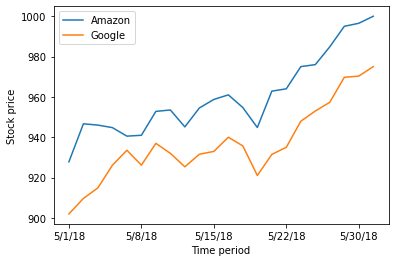

In [28]:
stock.plot(x = "Date", y = ["Amazon", "Google"])
plt.xlabel('Time period')
plt.ylabel('Stock price')


#### Q26- Plotting three series

When plotting three series, set the y-axis values to a list containing the three column names, each being a data series.

Text(0, 0.5, 'Stock price')

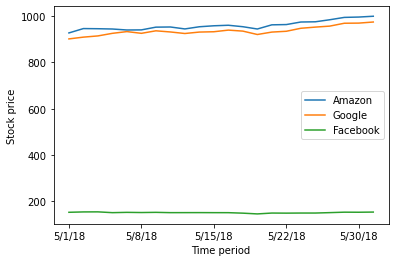

In [27]:
stock.plot(x = "Date", y = ["Amazon", "Google", "Facebook"])
plt.xlabel('Time period')
plt.ylabel('Stock price')


## Load the following dataset

In [38]:
import pandas as pd
mydata = pd.read_csv("/Users/ashok/Downloads/mba.csv", header=0, index_col ="School") #add header and index
mydata.head()

,Rank,Country,Average_salary,Pre_Salary,Grad_Jobs,PhD,Avg_Age_Students,Avg_Work_Experience,Tuition,Duration
School,,,,,,,,,,
Chicago (Booth),1,US,113217,63,93,96,27,60,106800,21
Dartmouth (Tuck),2,US,115143,62,97,100,28,60,106980,21
Virginia (Darden),3,US,104478,67,95,97,27,60,107800,21
Harvard,4,US,121785,44,97,94,27,48,107000,18
Columbia,5,US,113340,55,98,97,28,60,111736,20


#### Q27-Plot the Box plot using both approach available in pandas: 

    * .plot
    * .boxplot

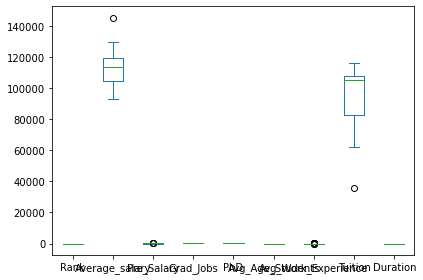

In [155]:
mydata.plot.box();

<AxesSubplot:>

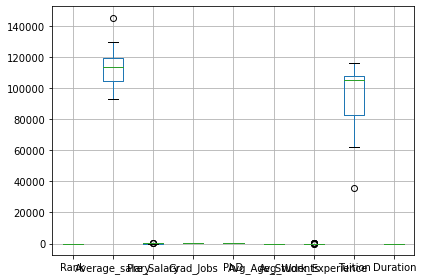

In [157]:
mydata.boxplot()

#### Q28- creat a box plot of two variables: "the average student" and "average work experience" in one graph (side by side)

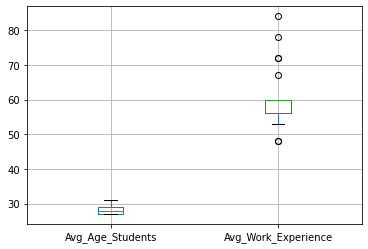

In [43]:
box_plot = mydata.boxplot(column=["Avg_Age_Students", "Avg_Work_Experience"])

#### Q29- Formatting with .boxplot().
change the following parameters for the previous question as grid=False and fontsize=14:

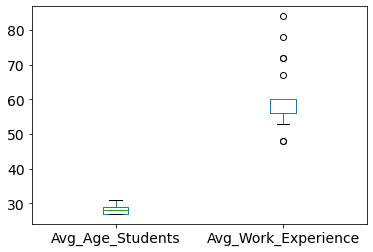

In [47]:
box_plot = mydata.boxplot(column=["Avg_Age_Students", "Avg_Work_Experience"], grid=False, fontsize=14)

#### Q30-Histograms
plot the histogram of Tuitions with proper bins

array([[<AxesSubplot:title={'center':'Tuition'}>]], dtype=object)

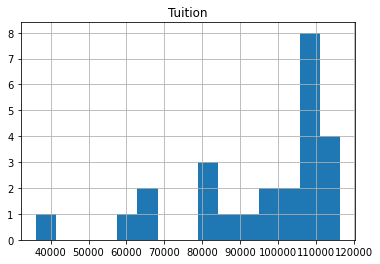

In [49]:
mydata.hist(column = ["Tuition"], bins = 15)

#### Q31-Scatter plots
plot the scatter plot using Rank (x-axis) and Grad_job (y-axis) and set the proper xlim

(-3.0, 30.0)

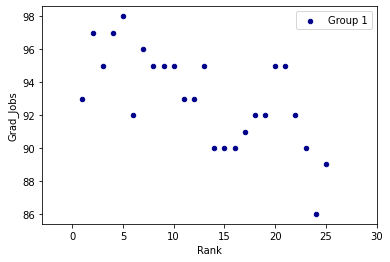

In [50]:
scatter_plot = mydata.plot.scatter(x="Rank", y="Grad_Jobs", color="DarkBlue", label="Group 1")
scatter_plot.set_xlim(-3, 30)

#### Q32-Bar charts
plot horrizontal bar graph for Tuition and assign a proper title for your graph - sort your bar graphs in ascending order

<AxesSubplot:title={'center':'Tuition'}, ylabel='School'>

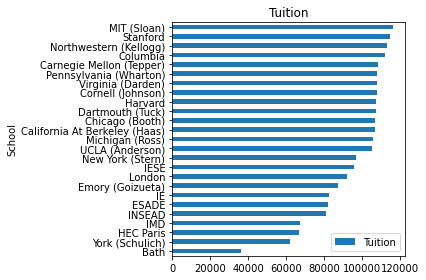

In [59]:
mydata.sort_values(by = ["Tuition"], ascending = True).plot.barh(y = 'Tuition', title = "Tuition")

### Q33-Refine the bar chart with a few aesthetic elements.


* The legend parameter is set to False to remove the redundant legend.
* The color parameter can set the color values using RGB. RGB is a way of making colors. You have to provide an amount of red, green and blue + the transparency and it returns a color.
* The edgecolor parameter allows you to set the border of the bars.

<AxesSubplot:title={'center':'Tuition'}, ylabel='School'>

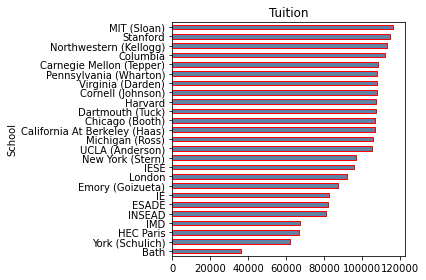

In [58]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True}) 
mydata.sort_values(by = ["Tuition"], ascending=True).plot.barh( y = "Tuition", title="Tuition", color=(0.1,0.3,0.5,0.7), edgecolor='red', legend=False)